<b>Sales Channel Prediction Case Study </b>

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.

Dataset: https://github.com/dsrscientist/DSData/blob/master/Advertising.csv

<b>Importing Necessary Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
channel_data=pd.read_csv("Advertising.csv")
channel_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Removing the unnecessary attribute
channel_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
channel_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<b>Observation:</b>
After removing the unnecessary column, there are 4 columns i.e. TV, radio, newspaper, sales.

In [5]:
channel_data.shape

(200, 4)

In [6]:
channel_data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [96]:
channel_data.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,5.087133,13.980808
std,85.443221,14.862111,1.979428,5.196097
min,0.700000,0.000000,0.547723,1.600000
25%,74.800000,9.925000,3.556663,10.325000
50%,149.750000,22.400000,5.059644,12.900000
75%,218.475000,36.325000,6.636937,17.375000
max,293.600000,49.600000,9.455157,27.000000


<b>Observation:</b>
Except for TV, other attributes has mean is greater than median.

<b> Checking Missing values</b>

In [7]:
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [8]:
channel_data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<b> Exploratory Data Analysis</b>

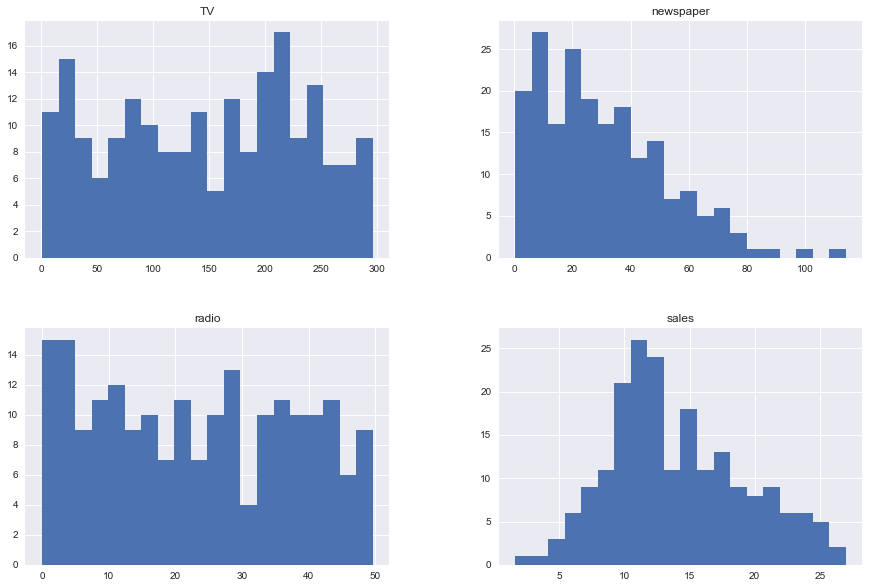

In [36]:
# Data Distribution 
channel_data.hist(figsize=(15,10),grid=True,bins=20);

<b>Observation:</b>
Out of 4 attributes, one attribute(newspaper) is right skewed.

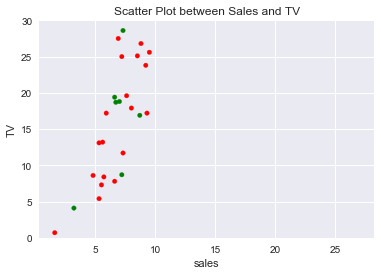

In [51]:
# Scatter Plot
colors=("red","green")
channel_data.plot.scatter(x="sales",y="TV",ylim=(0,30),c=colors);
plt.title("Scatter Plot between Sales and TV")

<b>Observation:</b>
There is weak positive linear association between sales and TV. 

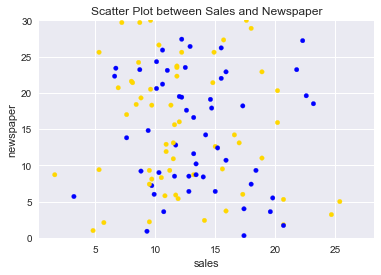

In [62]:
colors=("gold","blue")
channel_data.plot.scatter(x="sales",y="newspaper",ylim=(0,30),c=colors);
plt.title("Scatter Plot between Sales and Newspaper")

<b>Observation:</b>
There is no association between newspaper and sales.

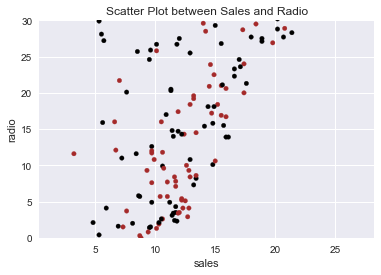

In [63]:
colors=("black","brown")
channel_data.plot.scatter(x="sales",y="radio",ylim=(0,30),c=colors);
plt.title("Scatter Plot between Sales and Radio")

<b>Observation:</b>
There is weak positive linear association between radio and sales.

<b>Multi-Variate Analysis</b>

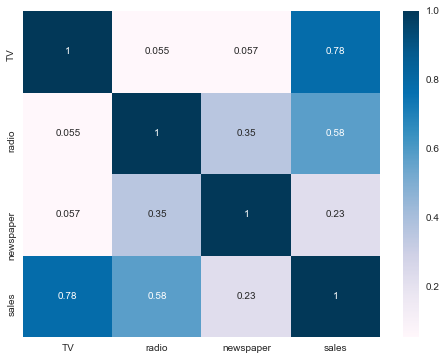

In [68]:
heatmap=channel_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(heatmap, cmap="PuBu",annot=True)

<b>Observation:</b>
There is strong correlation between TV and sales.

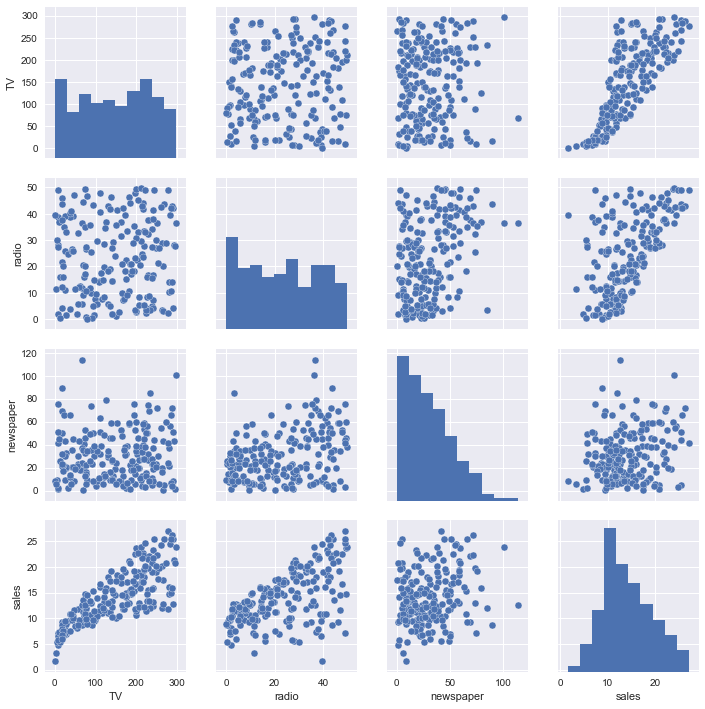

In [69]:
sns.pairplot(channel_data)

<b>Observation:</b>
There is linear relationship between TV and radio with sales.

<b>Checking outliers</b>

In [9]:
from scipy.stats import zscore
z_score=abs(zscore(channel_data))
print("The shape of dataset before removing outliers",channel_data.shape)
channel_data=channel_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",channel_data.shape)

The shape of dataset before removing outliers (200, 4)
The shape of dataset after removing outliers (198, 4)


<b>Checking skewness</b>

In [10]:
channel_data.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [11]:
# Treating the skewness in the dataset
import warnings
warnings.filterwarnings("ignore")
for index in channel_data.skew().index:
    if channel_data.skew().loc[index]>0.5:
        channel_data[index]=np.sqrt(channel_data[index])

In [12]:
channel_data.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

<b>Separating the dataset into input and output variables</b>

In [13]:
X= channel_data.drop("sales",axis=1)
y= channel_data[["sales"]]

<b>Standarization</b>

In [14]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the dataset into Training and Testing into (70:30) ratio</b>

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [16]:
# We are using R2 score to evaluate
from sklearn.metrics import r2_score
def max_r2_score(models,X,y):
    max_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        models.fit(X_train,y_train)
        y_pred= models.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((max_r2_score),3))

# Machine Learning Model

As the target variable(sales) is continuous, we are using Linear Regression,KNN Regressor,Support Vector Machine Regressor, Random Forest Regressor, Decision Tree Regressor and Gradient Boosting Regressor.

<b>Linear Regression</b>

In [38]:
from sklearn.linear_model import LinearRegression
Lin_reg=LinearRegression()
max_r2_score(Lin_reg,X,y)

Maximum R2_Score corresponding: 90  and it is : 0.936


In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Lin_reg = GridSearchCV(Lin_reg,parameters, cv=5)
Lin_reg.fit(X,y)
Lin_reg.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [40]:
Lin_reg=LinearRegression(fit_intercept=True,normalize=False)
max_r2_score(Lin_reg,X,y)

Maximum R2_Score corresponding: 90  and it is : 0.936


In [41]:
pred_linreg= Lin_reg.predict(X_test)
m1= Lin_reg.score(X_test, y_test)
print("The accuracy of the Linear Regression Model is:",round((m1),3))

The accuracy of the Linear Regression Model is: 0.882


In [55]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_lr=cross_val_score(Lin_reg,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Linear Regression:",m_lr)
std_lr=cross_val_score(Lin_reg,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Linear Regression:",std_lr)

Mean R2 Score for Linear Regression: 0.8855266260381282
Standard Deviation in R2 Score for Linear Regression: 0.05028321512104191


In [56]:
# RMSE
from sklearn import metrics
lin_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_linreg))
lin_rmse

1.9872443187885984

<b>KNN Regressor</b>

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor()
parameters={"n_neighbors":range(2,50)}
kr= GridSearchCV(kr,parameters,cv=10)
kr.fit(X,y)
kr.best_params_

{'n_neighbors': 5}

In [51]:
kr= KNeighborsRegressor(n_neighbors=5)
max_r2_score(kr,X,y)

Maximum R2_Score corresponding: 52  and it is : 0.958


In [52]:
pred_kr= kr.predict(X_test)
m2= kr.score(X_test, y_test)
print("The accuracy of the KNN Regressor Model is:",round((m2),3))

The accuracy of the KNN Regressor Model is: 0.919


In [53]:
# Cross validation score
m_kr=cross_val_score(kr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for KNN Regressor:",m_kr)
std_kr=cross_val_score(kr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for KNN Regressor:",std_kr)

Mean R2 Score for KNN Regressor: 0.942525208572151
Standard Deviation in R2 Score for KNN Regressor: 0.03142831737227256


In [57]:
from sklearn import metrics
knn_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_kr))
knn_rmse

1.646752359443682

<b>Support vector Regressor</b>

In [58]:
from sklearn.svm import SVR
sv= SVR()
param= {"kernel":["linear", "poly","rbf"],"C":[0.001,0.01,1,10,100]}
sv=GridSearchCV(sv,param,cv=10)
sv.fit(X,y)
sv.best_params_

{'C': 100, 'kernel': 'rbf'}

In [59]:
sv=SVR(kernel="rbf", C=100)
max_r2_score(sv,X,y)

Maximum R2_Score corresponding: 59  and it is : 0.992


In [60]:
pred_sv= sv.predict(X_test)
m3= sv.score(X_test, y_test)
print("The accuracy of the SVM Regressor Model is:",round((m3),3))

The accuracy of the SVM Regressor Model is: 0.989


In [61]:
# Cross validation score
m_sv=cross_val_score(sv,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Support Vector Regressor:",m_sv)
std_sv=cross_val_score(sv,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Support Vector Regressor:",std_sv)

Mean R2 Score for Support Vector Regressor: 0.9872984597955249
Standard Deviation in R2 Score for Support Vector Regressor: 0.010231938970379313


In [62]:
from sklearn import metrics
sv_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_sv))
sv_rmse

0.6135348028203645

<b>Random Forest Regressor</b>

In [63]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
param_grid = {
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]
}
rfr= GridSearchCV(rfr, param_grid,cv=5)
rfr.fit(X,y)
rfr.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [65]:
rfr=RandomForestRegressor(max_depth=80,max_features=3,min_samples_leaf=3,min_samples_split=10,n_estimators=500)
max_r2_score(rfr,X,y)

Maximum R2_Score corresponding: 81  and it is : 0.974


In [66]:
pred_rf= rfr.predict(X_test)
m4= rfr.score(X_test, y_test)
print("The accuracy of the Random Forest Regressor Model is:",round((m4),3))

The accuracy of the Random Forest Regressor Model is: 0.968


In [67]:
# Cross validation score
from sklearn.model_selection import cross_val_score
krf=cross_val_score(rfr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Random Forest Regressor:",krf)
std_rf=cross_val_score(rfr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Random Forest Regressor:",std_rf)

Mean R2 Score for Random Forest Regressor: 0.9679339366634517
Standard Deviation in R2 Score for Random Forest Regressor: 0.008721350012043275


In [68]:
from sklearn import metrics
rf_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_rf))
rf_rmse

1.0393930797775028

<b>Decision Tree Regressor</b>

In [81]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
dr=GridSearchCV(dr,param_grid,cv=10)
dr.fit(X,y)
dr.best_params_

{'criterion': 'mse',
 'max_depth': 2,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [83]:
dr=DecisionTreeRegressor(criterion="mse",max_depth=2,max_leaf_nodes=20,min_samples_leaf=20,min_samples_split=10)
max_r2_score(dr,X,y)

Maximum R2_Score corresponding: 42  and it is : 0.883


In [84]:
pred_dr= dr.predict(X_test)
m5= dr.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((m5),3))

The accuracy of the Decision Tree Model is: 0.863


In [85]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_dr=cross_val_score(dr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Decision Tree Regressor:",m_dr)
std_dr=cross_val_score(dr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Decision Tree Regressor:",std_dr)

Mean R2 Score for Decision Tree Regressor: 0.8396354347927074
Standard Deviation in R2 Score for Decision Tree Regressor: 0.041315668195803325


In [86]:
from sklearn import metrics
dr_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_dr))
dr_rmse

2.14588602104045

<b>Gradient Boosting Regressor</b>

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters= {'learning_rate': [0.01, 0.02,0.09], 'subsample': [0.9, 0.5,0.6], 'n_estimators': [50,100,500], 'max_depth': [4,6,8]}
gbr= GridSearchCV(estimator=gbr, param_grid= parameters, cv=5, n_jobs=-1)
gbr.fit(X_train,y_train)
gbr.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

In [30]:
gbr = GradientBoostingRegressor(learning_rate=0.02,max_depth=4,n_estimators=500,subsample=0.5)
max_r2_score(gbr,X,y)

Maximum R2_Score corresponding: 74  and it is : 0.994


In [88]:
pred_gbr= gbr.predict(X_test)
m6= gbr.score(X_test, y_test)
print("The accuracy of the Gradient Boosting Regressor Model is:",round((m6),3))

The accuracy of the Gradient Boosting Regressor Model is: 0.997


In [89]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_gr=cross_val_score(gbr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Gradient Boosting Regressor:",m_gr)
std_gr=cross_val_score(gbr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Gradient Boosting Regressor:",std_gr)

Mean R2 Score for Gradient Boosting Regressor: 0.9872045852590622
Standard Deviation in R2 Score for Gradient Boosting Regressor: 0.007162045933304213


In [90]:
from sklearn import metrics
gr_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_gbr))
gr_rmse

0.31372874454582494

# Evaluation:

In [93]:
#Lets initialise the data frame with columns model and f1_score
eval= [["Linear Regression",m1,m_lr,std_lr,lin_rmse],["KNN Regressor", m2,m_kr,std_kr,knn_rmse],["SVM Regressor", m3,m_sv,std_sv,sv_rmse],["Random Forest Regressor", m4, krf,std_rf,rf_rmse],["Decision Tree Regressor", m5, m_dr,std_dr,dr_rmse],["Gradient Boosting Regressor", m6, m_gr,std_gr,gr_rmse]]
result= pd.DataFrame(eval, columns=["Model Name", "Accuracy","Mean R2 Score", "Std. Deviation in R2 Score","RMSE"], index=[1,2,3,4,5,6])
result

,Model Name,Accuracy,Mean R2 Score,Std. Deviation in R2 Score,RMSE
1,Linear Regression,0.882348,0.885527,0.050283,1.987244
2,KNN Regressor,0.919211,0.942525,0.031428,1.646752
3,SVM Regressor,0.988786,0.987298,0.010232,0.613535
4,Random Forest Regressor,0.967815,0.967934,0.008721,1.039393
5,Decision Tree Regressor,0.862814,0.839635,0.041316,2.145886
6,Gradient Boosting Regressor,0.997068,0.987205,0.007162,0.313729


<b>Observations:</b>
<li> As the target variable is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li>From the above Model Evaluation, we can see that Gradient Boosting Regressor performed well (99.7%) with lowest RMSE (0.313729).</li>

<b>Saving the Prediction</b>

As Gradient Boosting Regressor performed well. We are saving the prediction.

In [94]:
np.savetxt('Model6.csv',pred_gbr,delimiter=',')

In [95]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gbr, 'project6.pkl')

['project6.pkl']